In [34]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rounakrk","key":"879b330ca890cd9221a55d309f1bac2d"}'}

In [3]:
!mkdir -p ~/.kaggle 
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c pubg-finish-placement-prediction

 97% 97.0M/100M [00:00<00:00, 109MB/s]
100% 100M/100M [00:00<00:00, 115MB/s] 
 96% 234M/244M [00:02<00:00, 136MB/s]
100% 244M/244M [00:02<00:00, 117MB/s]
 77% 13.0M/17.0M [00:01<00:00, 12.4MB/s]
100% 17.0M/17.0M [00:01<00:00, 16.7MB/s]


In [5]:
import zipfile
from zipfile import ZipFile 
file_name="train_V2.csv.zip"
with ZipFile(file_name,'r') as zip: 
             zip.extractall() 
             print("done")

done


In [6]:
import pandas as pd
df = pd.read_csv(r'/content/train_V2.csv')

In [7]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [9]:
df.shape

(4446966, 29)

In [16]:
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,2.299759e+01,1.579506e+03,4.450467e+01,4.300759e+01,8.920105e+02,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,5.097262e+01,2.587399e+02,2.382811e+01,2.328949e+01,7.366478e+02,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.367000e+03,2.800000e+01,2.700000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.438000e+03,3.000000e+01,3.000000e+01,1.443000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,2.132000e+01,1.851000e+03,4.900000e+01,4.700000e+01,1.500000e+03,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,1.094000e+03,2.237000e+03,1.000000e+02,1.000000e+02,5.910000e+03,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [17]:
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [26]:
match_types_count = df.loc[:,"matchType"].value_counts().to_frame()

In [27]:
match_types_count

,matchType
squad-fpp,1756186
duo-fpp,996691
squad,626526
solo-fpp,536762
duo,313591
solo,181943
normal-squad-fpp,17174
crashfpp,6287
normal-duo-fpp,5489
flaretpp,2505


In [28]:
squad_match_count = m_types2.loc[["squad-fpp","squad","normal-squad-fpp","normal-squad"],"matchType"].sum()
duo_match_count = m_types2.loc[["duo-fpp","duo","normal-duo-fpp","normal-duo"],"matchType"].sum()
solo_match_count = m_types2.loc[["solo-fpp","solo","normal-solo-fpp","normal-solo"],"matchType"].sum()

In [30]:
different_macthes = pd.DataFrame([squad_match_count,duo_match_count,solo_match_count], index=["squad","duo","solo"], columns =["matchs count"])

In [31]:
different_macthes

,matchs count
squad,2400402
duo,1315970
solo,720713


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


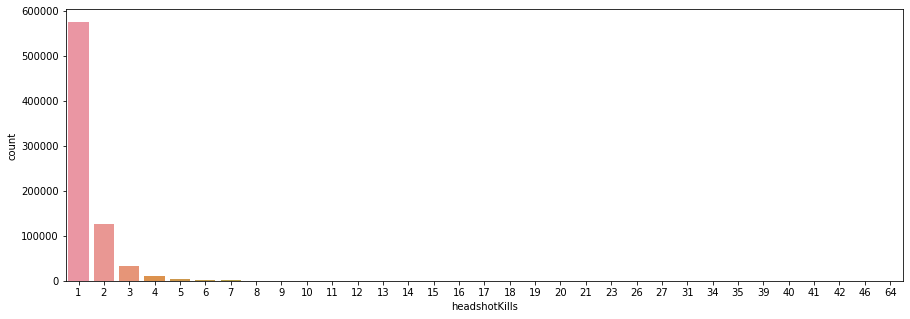

In [35]:
headshot_kill = df[df['headshotKills']>0]
plt.figure(figsize=(15,5))
sns.countplot(headshot_kill['headshotKills'].sort_values())

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Kill Counts')

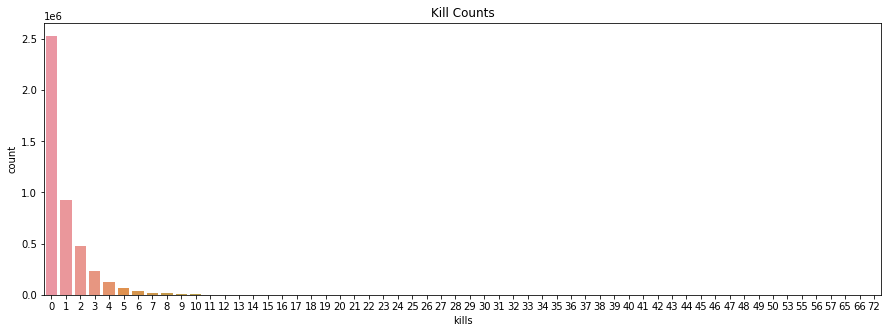

In [38]:
plt.figure(figsize=(15,5))
sns.countplot(df['kills']).set_title("Kill Counts")

In [46]:
new_df=df[df['kills']>0]
new_df=new_df[new_df['headshotKills']>0]

In [47]:
new_df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.0,1,1,0,44,0,1,1,18.440,1395,squad-fpp,28,28,1418,0,0.0,0,0.00,0,0,34.7,1,0,0.0370
13,b7807186e3f679,3c08e461874749,2c30ddf481c52d,0,1,324.2,0,1,5,5,986,4,1,49.830,1886,solo-fpp,97,94,-1,0,1228.0,0,76.84,0,0,2050.0,6,1462,0.8750
20,02ace8c6e58461,a4bc548028f800,80f2b8448e474b,0,4,269.1,0,1,8,18,0,2,1,7.438,1890,duo-fpp,48,48,1491,1,2734.0,0,0.00,0,0,1794.0,5,0,0.6383
22,9b2961d4d51f91,799d0a4d61dc3c,e833ca2282169d,0,1,192.3,1,2,3,15,1022,2,1,280.600,1775,duo-fpp,49,48,-1,0,2332.0,0,0.00,0,0,1264.0,4,1494,0.7500
23,0b6fbdfb59c994,7a75c3e86934f6,8b0a78c005cea0,0,6,1011.0,6,2,2,2,1564,9,2,186.600,1857,duo,50,45,-1,0,4860.0,0,0.00,0,0,2727.0,7,1603,0.9592


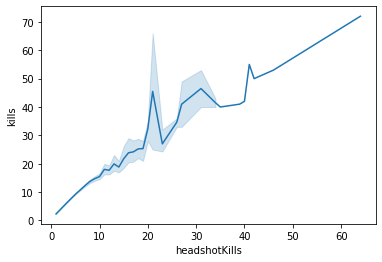

In [48]:
sns.lineplot(x='headshotKills', y='kills', data=new_df)

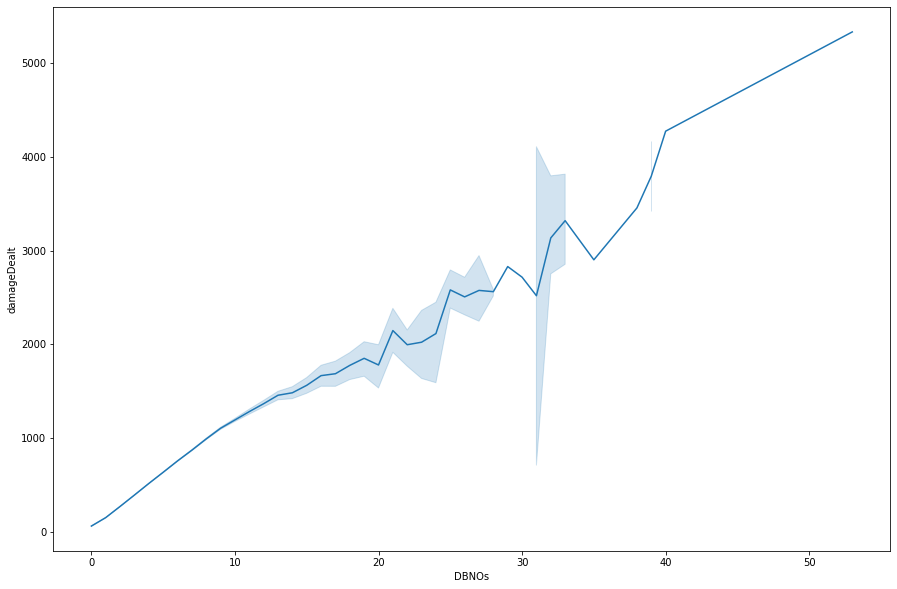

In [49]:
plt.figure(figsize=(15,10))
sns.lineplot(x='DBNOs', y='damageDealt', data=df)

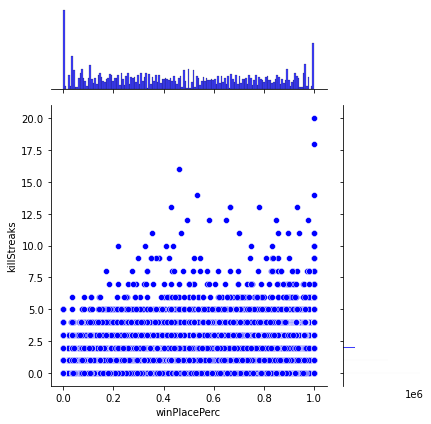

In [51]:
sns.jointplot(x='winPlacePerc', y='killStreaks', data=df, ratio=3, color='b', )
plt.show()

In [53]:
df['kills'].sort_values()

0           0
2557157     0
2557159     0
2557161     0
2557162     0
           ..
4273754    57
672993     57
334400     65
1248348    66
3431247    72
Name: kills, Length: 4446966, dtype: int64

In [56]:
kill_show = df[df['kills']>10].loc[:,['kills','damageDealt','winPlacePerc']]

In [63]:
kill_show[kill_show['winPlacePerc']==1].iloc[20:40,:]

,kills,damageDealt,winPlacePerc
31936,16,1479.0,1.0
32664,11,1338.0,1.0
34747,13,1274.0,1.0
36345,13,1114.0,1.0
37397,18,1683.0,1.0
40047,22,1988.0,1.0
42154,13,1377.0,1.0
42698,11,1093.0,1.0
43343,14,1467.0,1.0
45530,11,964.4,1.0


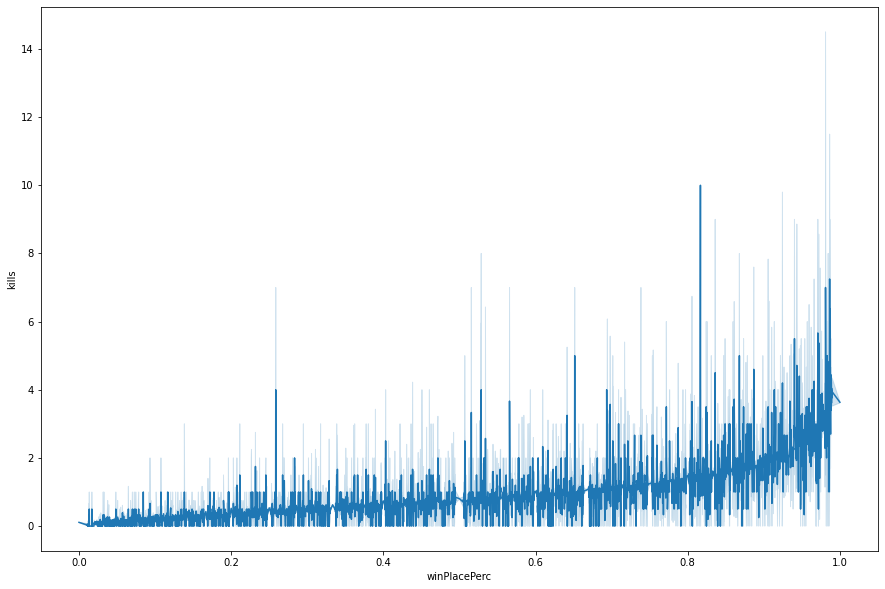

In [64]:
plt.figure(figsize=(15,10))
sns.lineplot(x='winPlacePerc', y='kills', data=df)

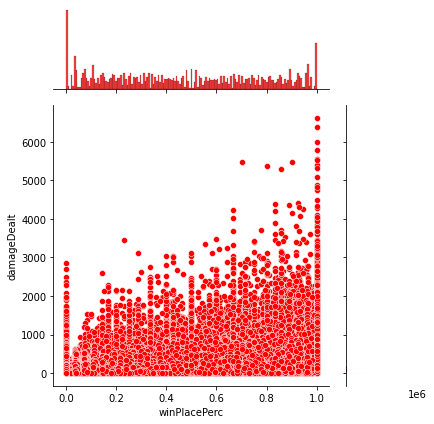

In [66]:
sns.jointplot(x='winPlacePerc', y='damageDealt', data=df, ratio=3, color='r')
plt.show()

This is the obvious correlation as the winning team would have done more damage to get to the top....In very less cases they dealt the least damage

In [68]:
xy=df[df['winPlacePerc']==1]
xy=xy[xy['damageDealt']<1000]

In [69]:
xy

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
67,22252be49d4419,37fa7583da2fa2,1ce1cb998f75c7,1,5,378.80,2,3,6,4,0,4,2,61.39,1297,squad-fpp,29,28,1431,0,317.7,0,0.00,0,1,3120.0,4,0,1.0
107,7970b4ea89e81e,abf9e2780b9f48,04832cfd74ff30,1,1,58.36,0,0,2,38,0,0,0,0.00,1708,squad,26,25,1494,0,5134.0,0,0.00,0,0,2708.0,7,0,1.0
118,953577684b828a,54ce33c41ef9ff,c5d412db6dbee4,2,6,76.11,0,0,12,45,0,0,0,0.00,1388,duo-fpp,49,47,1468,1,0.0,0,0.00,0,0,2635.0,7,0,1.0
123,174c758156bcf3,a935604c9bb7aa,edc87c8d445823,1,9,626.20,4,3,2,4,1333,6,2,85.74,1405,squad-fpp,29,28,-1,0,1045.0,0,0.00,0,0,2814.0,7,1566,1.0
186,eb7a3e9f50eca5,fe3d74f737cd10,92338c2233be1a,0,5,778.00,0,3,2,2,1693,8,1,158.90,1387,solo-fpp,98,97,-1,0,0.0,0,0.00,0,0,2422.0,5,1506,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446846,7fa83fe797d3c9,2b3e8b4c88730e,841d12ab0cf4c0,0,3,567.60,0,2,1,1,1000,6,1,79.30,1732,normal-solo-fpp,51,51,-1,0,0.0,0,92.31,0,0,3103.0,4,1500,1.0
4446851,94821d018a4c96,de5a790796b4e9,56c24019494299,1,6,886.30,5,2,3,2,0,6,2,54.87,1820,squad-fpp,30,30,1484,2,2216.0,0,0.00,0,0,3857.0,11,0,1.0
4446878,b4a03144c7f292,af465c2d950f4b,32eb0143ac4c6f,0,2,100.00,1,0,1,20,0,1,1,29.66,1290,squad-fpp,26,25,1484,0,0.0,0,0.00,0,0,2416.0,5,0,1.0
4446896,150f2e129ede6b,4417126d5b0d71,8dddf0ace87e54,0,5,129.40,1,0,0,13,0,2,1,270.20,1351,squad-fpp,30,29,1538,1,0.0,0,0.00,0,0,3320.0,3,0,1.0


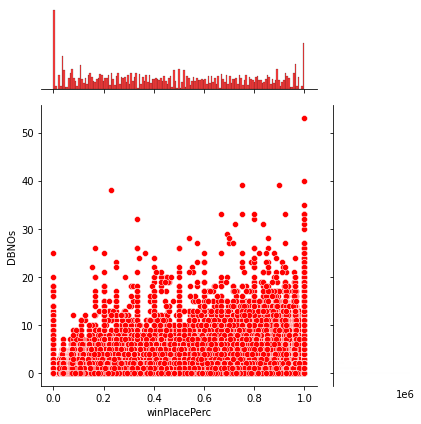

In [76]:
sns.jointplot(x='winPlacePerc', y='DBNOs', data=df, ratio=3, color='r')
plt.show()

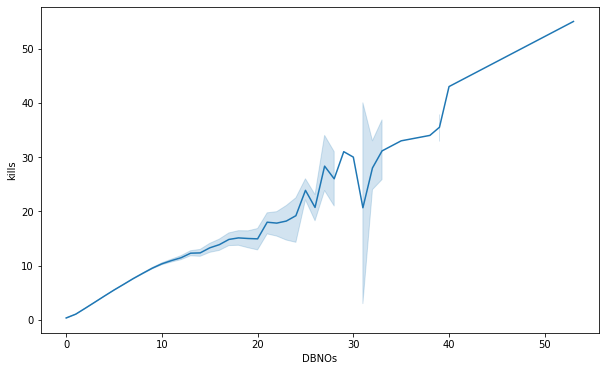

In [77]:
plt.figure(figsize=(10,6))
sns.lineplot(x='DBNOs', y='kills', data=df)

In [78]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


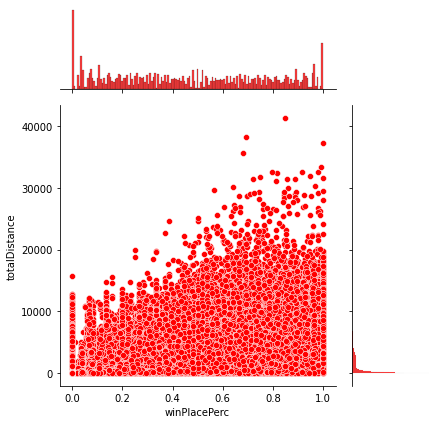

In [82]:
df['totalDistance'] = df['walkDistance'] + df['rideDistance'] + df['swimDistance']
sns.jointplot(x='winPlacePerc', y='totalDistance', data=df, ratio=3, color='r')
plt.show()

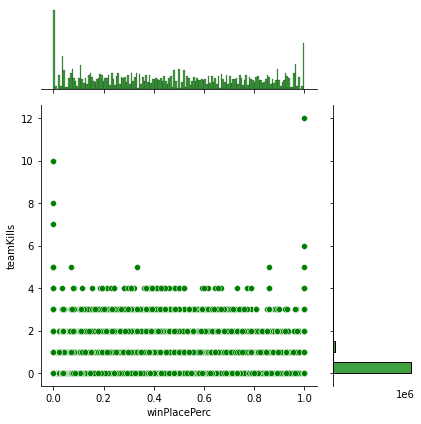

In [84]:
sns.jointplot(x='winPlacePerc', y='teamKills', data=df, ratio=3, color='g')
plt.show()

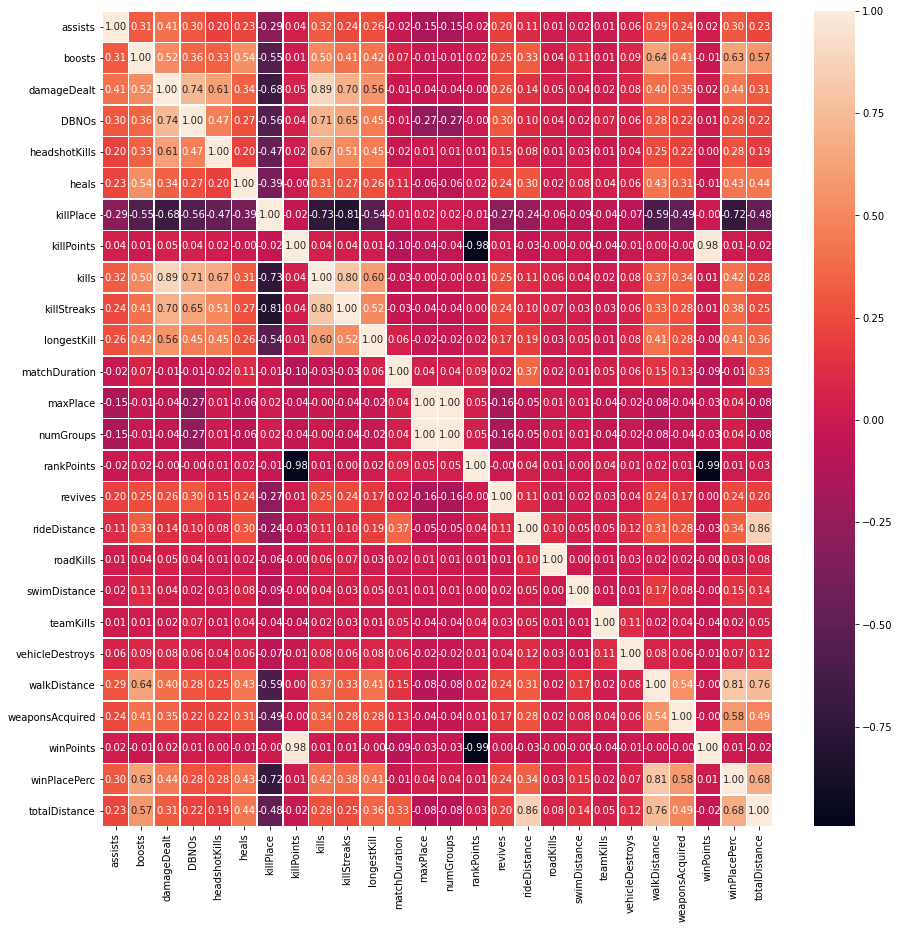

In [85]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()